# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-09-24 10:00:03.479923


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/23/20


,9/23/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,6933548,201884,2.91
Brazil,4591364,138105,3.01
India,5646010,90020,1.59
Mexico,710049,74949,10.56
United Kingdom,412245,41951,10.18
Italy,302537,35758,11.82
Peru,776546,31568,4.07


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 9/23/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
42555,US,6856884,2020-09-21,199865.0,356.0,52070.0,43318.857143
42554,US,6804814,2020-09-20,199509.0,227.0,36695.0,40670.285714
42553,US,6768119,2020-09-19,199282.0,712.0,44186.0,40428.000000
42552,US,6723933,2020-09-18,198570.0,937.0,49522.0,40040.142857
42551,US,6674411,2020-09-17,197633.0,870.0,44360.0,39758.714286
42550,US,6630051,2020-09-16,196763.0,982.0,37709.0,38548.428571
42549,US,6592342,2020-09-15,195781.0,1288.0,38690.0,37904.714286


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/23/20


,9/23/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,451892,33090.0,7.32
New Jersey,200988,16082.0,8.00
Texas,742913,15372.0,2.07
California,796436,15291.0,1.92
Florida,690499,13618.0,1.97
Massachusetts,128512,9347.0,7.27
Illinois,281303,8744.0,3.11


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 9/23/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1473,California,790096,2020-09-21,15056.0,40.0,3928.0,3566.000000
1472,California,786168,2020-09-20,15016.0,-2.0,2855.0,3491.428571
1471,California,783313,2020-09-19,15018.0,125.0,3822.0,3482.857143
1470,California,779491,2020-09-18,14893.0,89.0,4454.0,3512.285714
1469,California,775037,2020-09-17,14804.0,113.0,3716.0,3439.428571
1468,California,771321,2020-09-16,14691.0,97.0,3117.0,3433.000000
1467,California,768204,2020-09-15,14594.0,155.0,3070.0,3408.571429


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 9/23/20


,9/23/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,263333,6423.0,2.44
Orange,52538,1176.0,2.24
Riverside,57695,1173.0,2.03
San Bernardino,53121,908.0,1.71
San Diego,45425,767.0,1.69
San Joaquin,20060,434.0,2.16
Alameda,20839,395.0,1.90


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 9/23/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
4671,Los Angeles,261446,2020-09-21,6366.0,13.0,649.0,970.000000
4670,Los Angeles,260797,2020-09-20,6353.0,23.0,980.0,973.142857
4669,Los Angeles,259817,2020-09-19,6330.0,0.0,1301.0,948.714286
4668,Los Angeles,258516,2020-09-18,6330.0,6.0,1245.0,921.428571
4667,Los Angeles,257271,2020-09-17,6324.0,21.0,1123.0,892.428571
4666,Los Angeles,256148,2020-09-16,6303.0,30.0,1099.0,898.428571
4665,Los Angeles,255049,2020-09-15,6273.0,42.0,393.0,829.714286
4664,Los Angeles,254656,2020-09-14,6231.0,23.0,671.0,833.571429
4663,Los Angeles,253985,2020-09-13,6208.0,11.0,809.0,807.285714
4662,Los Angeles,253176,2020-09-12,6197.0,26.0,1110.0,804.857143



7 day new US cases as of 9/23/20


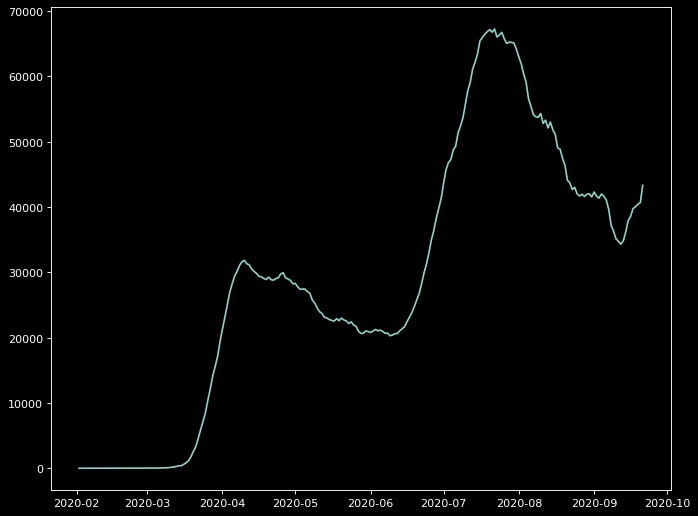

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 9/23/20


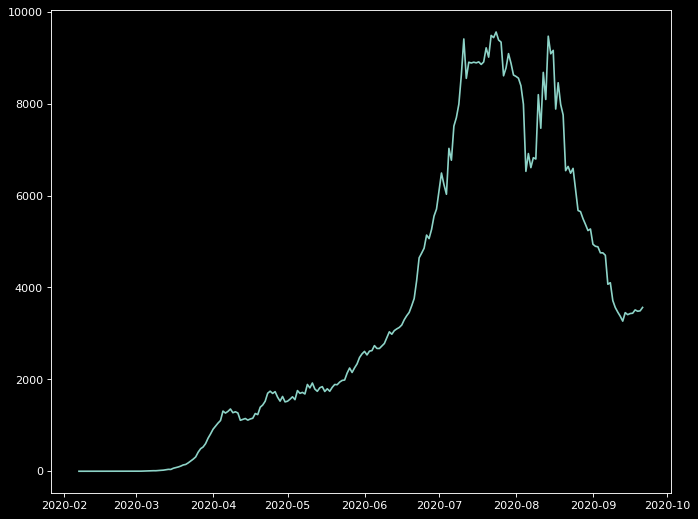

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 9/23/20


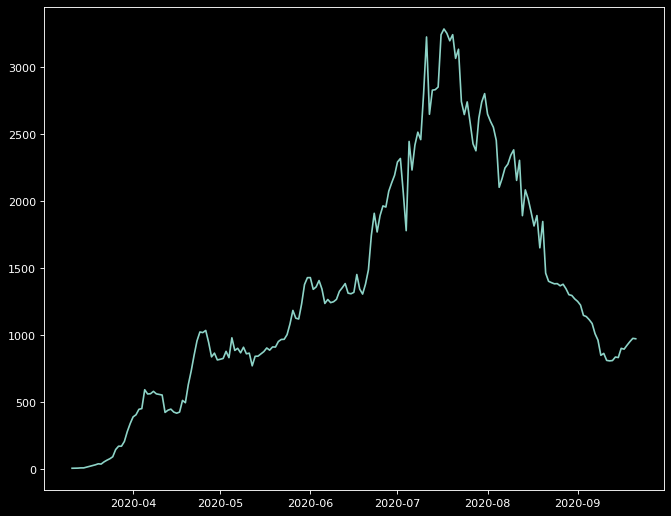

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()